In [82]:
import pandas as pd
sms_spam  = pd.read_csv("D:\python\spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["Label", "SMS"])
print(sms_spam.shape)
sms_spam.head()

(5571, 2)


,Label,SMS
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [83]:
sms_spam['Label'].value_counts(normalize=True)

ham     0.865913
spam    0.134087
Name: Label, dtype: float64

In [84]:
data_randomized = sms_spam.sample(frac=1, random_state=1)

training_test_index = round(len(data_randomized) * 0.8)

training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4457, 2)
(1114, 2)


In [85]:
training_set['Label'].value_counts(normalize=True)

ham     0.865829
spam    0.134171
Name: Label, dtype: float64

In [86]:
test_set['Label'].value_counts(normalize=True)

ham     0.866248
spam    0.133752
Name: Label, dtype: float64

Data Cleaning
When a new message comes in, our multinomial Naive Bayes algorithm will make the classification based on the results it gets to these two equations below, where "w1" is the first word, and w1,w2, ..., wn is the entire message:

Equation
Equation
If P(Spam | w1,w2, ..., wn) is greater than P(Ham | w1,w2, ..., wn), then the message is spam.

To calculate P(wi|Spam) and P(wi|Ham), we need to use separate equations:

Equation
Equation
Let's clarify some of the terms in these equations:

Equation
Equation
Equation
Equation
Equation
Equation
To calculate all these probabilities, we'll first need to perform a bit of data cleaning to bring the data into a format that allows us to easily extract all the information we need. 

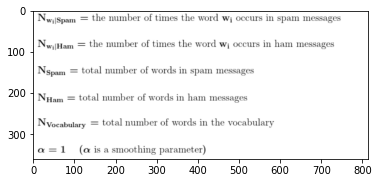

In [87]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('Screenshot.png')
plt.imshow(img)

In [88]:
# Before Cleaning

In [89]:
training_set.head(3)


,Label,SMS
0,ham,"I promise to take good care of you, princess. ..."
1,ham,Let me know how it changes in the next 6hrs. I...
2,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...


In [90]:
# After cleaning
training_set['SMS'] = training_set['SMS'].str.replace(
   '\W', ' ') # Removes punctuation
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head(3)

C:\Users\Sagar\AppData\Local\Temp/ipykernel_21472/2730067506.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  training_set['SMS'] = training_set['SMS'].str.replace(


,Label,SMS
0,ham,i promise to take good care of you princess ...
1,ham,let me know how it changes in the next 6hrs i...
2,spam,free 1st week entry 2 textpod 4 a chance 2 win...


In [91]:
training_set['SMS'] = training_set['SMS'].str.split()
vocabulary = []
for sms in training_set['SMS']:
    for word in sms:
        vocabulary.append(word)
vocabulary = list(set(vocabulary))
print(vocabulary)

['chip', 'wont', 'screaming', 'kiosk', 'shoranur', 'scenario', 'gods', 'suzy', 'box97n7qp', 'wid', 'bhayandar', 'mtmsgrcvd18', 'half', 'wine', 'mathe', 'stoptxtstopå', 'really', '09099726395', 'gudni8', 'volcanoes', 'barkleys', 'craving', 'kadeem', 'smell', 'crazy', 'sp', 'further', 'clip', 'toshiba', '1stone', 'servs', 'syllabus', 'muhommad', 'whn', 'tool', 'les', '400mins', 'blanket', 'donåõt', 'surprise', 'box177', '69876', 'true', 's', '0796xxxxxx', 'eta', 'contact', 'onto', 'across', 'alle', 'bin', 'craziest', 'resent', 'thatåõs', 'fishhead', 'memories', 'pretty', 'subscribe', 'nigpun', 'hf8', '67441233', 'restaurant', 'signing', 'jp', 'malarky', 'airport', 'nothing', 'mindset', 'huai', 'chiong', 'ten', 'repent', '09061790126', '95', 'lool', 'pros', 'update', 'salesman', 'condition', 'ibiza', 'africa', '08708800282', 'beautiful', 'coulda', 'undrstndng', 'bluetooth', 'headstart', 'rgent', 'signin', 'prescribed', 'marandratha', 'study', 'jog', 'debating', 'braved', 'sometext', 'shap

In [92]:
len(vocabulary)

7737

In [93]:
word_counts_per_sms = {'secret': [2,1,1],
                       'prize': [2,0,1],
                       'claim': [1,0,1],
                       'now': [1,0,1],
                       'coming': [0,1,0],
                       'to': [0,1,0],
                       'my': [0,1,0],
                       'party': [0,1,0],
                       'winner': [0,0,1]
                      }

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,secret,prize,claim,now,coming,to,my,party,winner
0,2,2,1,1,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0
2,1,1,1,1,0,0,0,0,1


In [94]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [96]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,chip,wont,screaming,kiosk,shoranur,scenario,gods,suzy,box97n7qp,wid,...,5000,24th,word,lovingly,kz,messenger,little,order,pleased,1500
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,chip,wont,screaming,kiosk,shoranur,scenario,gods,suzy,...,5000,24th,word,lovingly,kz,messenger,little,order,pleased,1500
0,ham,"[i, promise, to, take, good, care, of, you, pr...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[let, me, know, how, it, changes, in, the, nex...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,"[free, 1st, week, entry, 2, textpod, 4, a, cha...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[they, can, try, they, can, get, lost, in, fac...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,"[xclusive, clubsaisai, 2morow, 28, 5, soiree, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

In [99]:
# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)


In [100]:
# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

In [101]:
# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

In [102]:
# N_Vocabulary
n_vocabulary = len(vocabulary)

In [103]:
# Laplace smoothing
alpha = 1

Calculating Parameters
Now that we have the constant terms calculated above, we can move on with calculating the parameters P(wi|Spam) and P(wi|Ham).

P(wi|Spam) and P(wi|Ham) will vary depending on the individual words. For instance, P("secret"|Spam) will have a certain probability value, while P("cousin"|Spam) or P("lovely"|Spam) will most likely have other values.

Therefore, each parameter will be a conditional probability value associated with each word in the vocabulary.

The parameters are calculated using these two equations:


p(wi/spam) = (Nwi/spam +alpha)
            ------------------
            Nspam + alpha. Nvocab
            
 p(wi/ham) = (Nwi/ham +alpha)
            ------------------
            Nham + alpha. Nvocab

In [104]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

In [105]:
# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    parameters_spam[word] = p_word_given_spam

    n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    parameters_ham[word] = p_word_given_ham

In [106]:
# Calculate new message 


In [112]:
import re

def classify(message):
    '''
    message: a string
    '''

    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham: 
            p_ham_given_message *= parameters_ham[word]
            
    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)
    
    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
         print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

In [113]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 5.588761453036754e-26
P(Ham|message): 2.2301593769743494e-27
Label: Spam


In [114]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 1.3135321860262849e-25
P(Ham|message): 4.898432592530827e-21
Label: Ham


In [115]:
#TEst accuracy calc

In [126]:
def classify_test_set(message):
    '''
    message: a string
    '''

    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
            
    if p_ham_given_message > p_spam_given_message:
        return ('ham')
    
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [127]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted
0,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,spam
1,spam,"As a valued customer, I am pleased to advise y...",spam
2,ham,Sure but since my parents will be working on T...,ham
3,ham,You're not sure that I'm not trying to make xa...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [128]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1104
Incorrect: 10
Accuracy: 0.9910233393177738
